In [1]:
#Python weather API project
#-------Scatters-------------
#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude

from citipy import citipy
import openweathermapy.core as owm
import decimal
import requests
import json
import numpy as np
import pandas as pd
from configapi import gkey
import matplotlib.pyplot as plt
import random
from random import shuffle

In [2]:
#Generating random numbers for longitude
long = []
while len(long) < 600:
    long.append(random.randint(-1800000, 1800000)/10000)
    shuffle(long)

In [3]:
#Generating random numbers for lattitude (staying under 80's for major cities)
lat = []
while len(lat) < 600:
    lat.append(random.randint(-800000, 800000)/10000)
    shuffle(lat)

In [4]:
#Creating initial DF with my longitude and latitude
weather = pd.DataFrame({"Latitude": lat, "Longitude": long})
weather.head()

Latitude  Longitude
0    1.1132  -171.3875
1   60.1443   159.2468
2  -33.7854    43.1325
3  -26.9358   -26.3480
4   72.1905   161.0822

In [5]:
#Building columns in my DF to place data
weather["City"] = ""
weather["Country"] = ""
weather["Temperature"] = ""
weather["Cloudiness"] = ""
weather["Wind Speed"] = ""
weather["Humidity"] = ""
weather["City ID"] = ""
weather["URL"] = ""
weather = weather [["City","Country", "Temperature", "Cloudiness", "Wind Speed", "Humidity","Latitude","Longitude","City ID", "URL"]]
weather.head()

City Country Temperature Cloudiness Wind Speed Humidity  Latitude  \
0                                                            1.1132   
1                                                           60.1443   
2                                                          -33.7854   
3                                                          -26.9358   
4                                                           72.1905   

   Longitude City ID URL  
0  -171.3875              
1   159.2468              
2    43.1325              
3   -26.3480              
4   161.0822

In [6]:
# Using the Citipy library to pull in cities using the random longitude and lattitude numbers obtained above
#Placing the cities in the Dataframe

for index, row in weather.iterrows():
    latitude = row['Latitude']
    longitude = row ["Longitude"]
    
    weather.set_value(index, "City", citipy.nearest_city(latitude, longitude).city_name)
    weather.set_value(index, "Country", citipy.nearest_city(latitude, longitude).country_code)
    
weather.head()

C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


City Country Temperature Cloudiness Wind Speed Humidity  Latitude  \
0    saleaula      ws                                               1.1132   
1      palana      ru                                              60.1443   
2    tsihombe      mg                                             -33.7854   
3  vila velha      br                                             -26.9358   
4    cherskiy      ru                                              72.1905   

   Longitude City ID URL  
0  -171.3875              
1   159.2468              
2    43.1325              
3   -26.3480              
4   161.0822

In [7]:
#--------------------------------------------------------------------------
# Starting API calls
#--------------------------------------------------------------------------
# Using Imperial metrics to grab Fahrenheit
#URL Structure obtained here: https://openweathermap.org/current#data
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

In [8]:
#Testing an API pull, looking at the JSON
print (url + "&appid=" + gkey + "&q=" + "Las Vegas")

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=950e9ed0f4c0085f9a9076f8c4369dfc&q=Las Vegas


In [9]:
#Looping through the DF: grabbing url, api key, and city. 
#Building the url 
#pulling it in json format
for index, row in weather.iterrows():
    city = row['City']
    
    try:
        url_build = url + "&appid=" + gkey + "&q=" + city
        weather_info = requests.get(url_build).json()
        
#Placing in DF       

        weather.set_value(index, "Temperature", weather_info['main']['temp'])
        weather.set_value(index, "Humidity", weather_info['main']['humidity'])
        weather.set_value(index, "Cloudiness", weather_info['clouds']['all'])
        weather.set_value(index, "Wind Speed", weather_info['wind']['speed'])
        weather.set_value(index, "City ID", weather_info['id'])
        weather.set_value(index, "URL", url_build)
        print(f"{city},{weather_info['id']}")


#If it does not work then place "NaN" in location
    except:
        weather.set_value(index, "Temperature", "No Data from API")
        weather.set_value(index, "Humidity", "No Data from API")
        weather.set_value(index, "Cloudiness", "No Data from API")
        weather.set_value(index, "Wind Speed", "No Data from API")
        weather.set_value(index, "City ID", "No Data from API")
        weather.set_value(index, "URL", "No Data from API")
        
        print("NaN")

C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future rele

NaN


C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\Craig\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_l

palana,2122262
NaN
vila velha,6320062
cherskiy,2126199
nargana,3703946
pangnirtung,6096551
geraldton,5960603
acoyapa,3620978
omboue,2396853
mpika,905846
kavieng,2094342
NaN
sioux lookout,6148373
NaN
NaN
vila franca do campo,3372472
kapaa,5848280
acapulco,3533462
saint george,262462
lebu,344979
arraial do cabo,3471451
kerema,2094144
norman wells,6089245
fortuna,2517679
batagay-alyta,2027042
hilo,5855927
jiblah,74185
NaN
NaN
kalmunai,1242110
bay roberts,5895424
punta arenas,3874787
glendive,5654391
kodiak,4407665
NaN
rikitea,4030556
port elizabeth,4501427
thompson,6165406
codrington,2160063
victoria,1733782
norman wells,6089245
yaan,2338660
punta arenas,3874787
iquique,3887127
jamestown,2069194
vaini,1273574
ponta do sol,3453439
goderich,5962442
NaN
liaozhong,2036106
NaN
kaupanger,7288345
NaN
havelock,4470244
albany,5106834
ribeira grande,3372707
chumikan,2025256
butaritari,2110227
puerto ayora,3652764
katsuura,1865309
NaN
carnarvon,1014034
victoria,1733782
NaN
carnarvon,1014034
ushuaia,

NaN
ushuaia,3833367
victoria,1733782
NaN
quatre cocos,1106643
dauriya,2025099
georgetown,3378644
klaksvik,2618795
saint-pierre,2995603
busselton,2075265
padang,1633419
faya,110690
rikitea,4030556
NaN
manjeri,1263694
kruisfontein,986717
NaN
chokurdakh,2126123
rikitea,4030556
NaN
faanui,4034551
puerto ayora,3652764
NaN
arraial do cabo,3471451
gravdal,3147822
tuatapere,2180815
terrace,6162949
tabou,2281120
kavieng,2094342
albany,5106834
geraldton,5960603
kamsack,5989068
saskylakh,2017155
petropavlovsk-kamchatskiy,2122104
san policarpo,1688696
castro,3896218
thompson,6165406
agaro,344661
san giovanni in fiore,2523461
sur,286245
ostrovnoy,556268
cidreira,3466165
gamba,1281256
san vicente,3583178
busselton,2075265
busselton,2075265
palmas,3474574
herat,1140026
rikitea,4030556
jamestown,2069194
ushuaia,3833367
port macquarie,2152659
punta arenas,3874787
yerbogachen,2012956
laem sing,1609278
victoria,1733782
coruripe,3465329
punta arenas,3874787
NaN
hovd,7626384
butaritari,2110227
yartsevo,468

In [10]:
weather.head()

City Country       Temperature        Cloudiness        Wind Speed  \
0    saleaula      ws  No Data from API  No Data from API  No Data from API   
1      palana      ru              29.8                92              6.11   
2    tsihombe      mg  No Data from API  No Data from API  No Data from API   
3  vila velha      br              78.8                75              5.82   
4    cherskiy      ru             14.32                80              4.65   

           Humidity  Latitude  Longitude           City ID  \
0  No Data from API    1.1132  -171.3875  No Data from API   
1                76   60.1443   159.2468           2122262   
2  No Data from API  -33.7854    43.1325  No Data from API   
3                94  -26.9358   -26.3480           6320062   
4                78   72.1905   161.0822           2126199   

                                                 URL  
0                                   No Data from API  
1  http://api.openweathermap.org/data/2.5/weather...  
2                                   No Data from API  
3  http://api.openweathermap.org/data/2.5/weather...  
4  http://api.openweathermap.org/data/2.5/weather...

In [11]:
#Removing the the "no data" returns
weather_cleaned = weather[weather["URL"]!="No Data from API"]
weather_cleaned.count()

City           541
Country        541
Temperature    541
Cloudiness     541
Wind Speed     541
Humidity       541
Latitude       541
Longitude      541
City ID        541
URL            541
dtype: int64

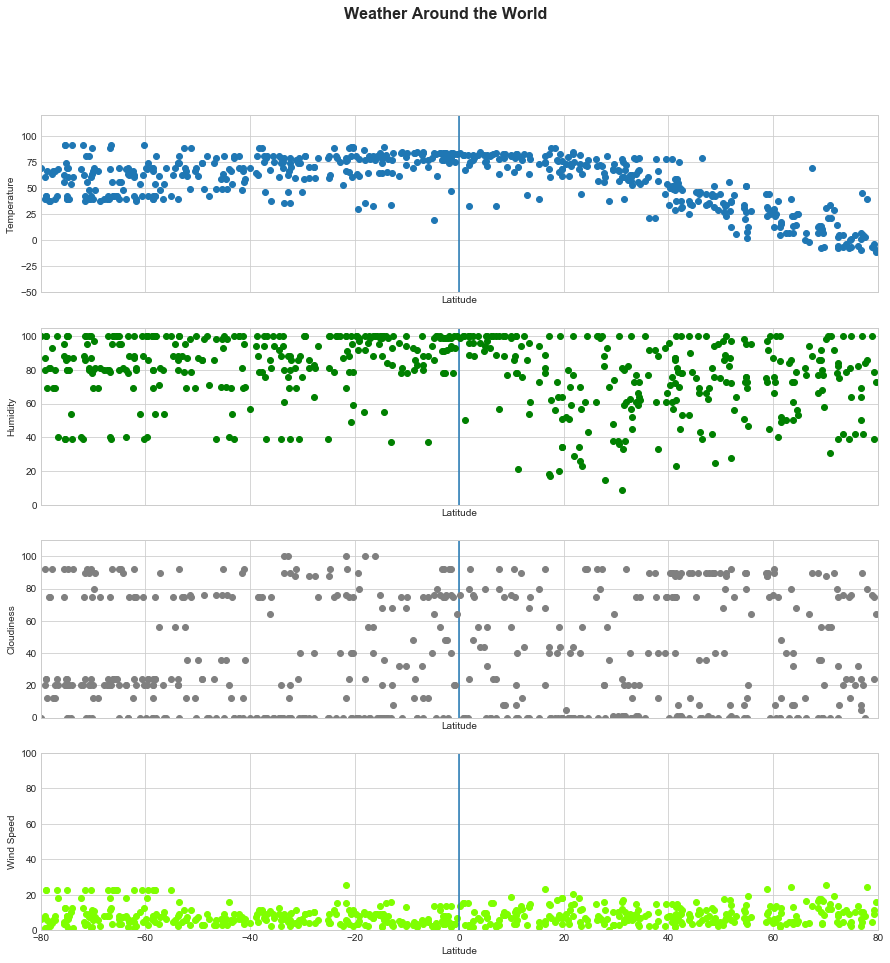

In [12]:
#Creating scatter charts
import seaborn as sns
sns.set_style("whitegrid")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True,figsize=(15,15))

fig.suptitle("Weather Around the World", fontsize=16, fontweight="bold")

#Temp vs Latitude
ax1.set_xlim(-80, 80)
ax1.set_ylim(-50, 120)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Temperature")
ax1.axvline(x=0)
ax1.plot(weather_cleaned["Latitude"], weather_cleaned["Temperature"], linewidth=0, marker='o')


#Humidity vs Latitude
ax2.set_xlim(-80, 80)
ax2.set_ylim(0, 105)
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Humidity")
ax2.axvline(x=0)
ax2.plot(weather_cleaned["Latitude"], weather_cleaned["Humidity"], linewidth=0, marker='o', color ="green")


#Coudiness vs Latitude
ax3.set_xlim(-80, 80)
ax3.set_ylim(0, 110)
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Cloudiness")
ax3.axvline(x=0)
ax3.plot(weather_cleaned["Latitude"], weather_cleaned["Cloudiness"], linewidth=0, marker='o', color ="grey")


#Wind Speed vs Latitude
ax4.set_xlim(-80, 80)
ax4.set_ylim(0, 100)
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Wind Speed")
ax4.plot(weather_cleaned["Latitude"], weather_cleaned["Wind Speed"], linewidth=0, marker='o', color ="chartreuse")
ax4.axvline(x=0)

plt.savefig("Weather.png")
plt.show()

In [ ]:
weather_cleaned.to_json("Weather.json")